In [6]:
import pandas as pd
n_publicos = pd.read_excel("Base_MUNIC_2021_20240425.xlsx", sheet_name="Recursos humanos")



In [66]:
n_publicos

,CodMun,UF,Cod UF,Mun,Pop,Faixa_pop,Regiao,Mreh0111,Mreh0112,Mreh0113,Mreh0114,Mreh0115,Mreh0116,Mreh02,Mreh0311,Mreh0312,Mreh0313,Mreh0314,Mreh0315,Mreh0316
0,1100015,RO,11,Alta Floresta DOeste,22516,4 - 20001 até 50000,1 - Norte,1175,92,85,0,0,1352,Sim,0,14,2,0,0,16
1,1100023,RO,11,Ariquemes,111148,6 - 100001 até 500000,1 - Norte,2185,163,235,77,114,2774,Sim,6,0,5,0,0,11
2,1100031,RO,11,Cabixi,5067,2 - 5001 até 10000,1 - Norte,250,22,64,0,0,336,Não,-,-,-,-,-,-
3,1100049,RO,11,Cacoal,86416,5 - 50001 até 100000,1 - Norte,1755,0,231,0,50,2036,Sim,93,0,50,0,2,145
4,1100056,RO,11,Cerejeiras,16088,3 - 10001 até 20000,1 - Norte,513,43,60,0,19,635,Não,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,GO,52,Vianópolis,14088,3 - 10001 até 20000,5 - Centro-Oeste,370,0,62,15,45,492,Sim,2,0,0,0,0,2
5566,5222054,GO,52,Vicentinópolis,9002,2 - 5001 até 10000,5 - Centro-Oeste,317,0,89,8,60,474,Sim,1,0,1,0,0,2
5567,5222203,GO,52,Vila Boa,6451,2 - 5001 até 10000,5 - Centro-Oeste,237,0,67,0,5,309,Não,-,-,-,-,-,-
5568,5222302,GO,52,Vila Propício,5941,2 - 5001 até 10000,5 - Centro-Oeste,138,0,139,0,15,292,Não,-,-,-,-,-,-


In [67]:
func_publicos = n_publicos[["CodMun","UF", "Mun","Pop", "Mreh0116"]]

In [68]:
func_publicos

,CodMun,UF,Mun,Pop,Mreh0116
0,1100015,RO,Alta Floresta DOeste,22516,1352
1,1100023,RO,Ariquemes,111148,2774
2,1100031,RO,Cabixi,5067,336
3,1100049,RO,Cacoal,86416,2036
4,1100056,RO,Cerejeiras,16088,635
...,...,...,...,...,...
5565,5222005,GO,Vianópolis,14088,492
5566,5222054,GO,Vicentinópolis,9002,474
5567,5222203,GO,Vila Boa,6451,309
5568,5222302,GO,Vila Propício,5941,292


In [73]:
pessoal_ocupado = pd.read_excel(r"C:\Users\Luiz Venosa\Documents\Questions\Grafico Camera\Dados consolidado\dados pessoal ocupado\Unidades Locais\Tabela 13.xlsx", header=3, skipfooter=5 )

In [74]:
pessoal_ocupado = pessoal_ocupado.iloc[29:, :]
pessoal_ocupado = pessoal_ocupado.rename(columns={"Unnamed:4": "Assalariado"})

In [62]:
pessoal_ocupado["Municípios"].str.split("-", expand=True)[[0, 1]]

,0,1
29,Alta Floresta D'Oeste,RO
30,Ariquemes,RO
31,Cabixi,RO
32,Cacoal,RO
33,Cerejeiras,RO
...,...,...
5594,Vianópolis,GO
5595,Vicentinópolis,GO
5596,Vila Boa,GO
5597,Vila Propício,GO


In [75]:
pessoal_ocupado[["Municípios", "uf"]] = pessoal_ocupado["Municípios"].str.split("-", expand=True)[[0, 1]]

In [76]:
pessoal_ocupado.reset_index()

,index,Unidades da Federação,Municípios,Número de unidades\nlocais,Pessoal ocupado,Unnamed: 4,Pessoal assalariado médio,Salários\ne outras\nremunerações\n(1 000 R$),Salário médio\n mensal \n(salários mínimos) (1) (2),Salário médio\n mensal \n(R$) (2),Número de empresas atuantes,uf
0,29,Rondônia,Alta Floresta D'Oeste,866.0,3706,2707,2664.23,8.912034e+04,2.123045,2573.130294,848.0,RO
1,30,Rondônia,Ariquemes,4730.0,24810,19196,18794.23,5.943546e+05,2.007128,2432.639248,4533.0,RO
2,31,Rondônia,Cabixi,201.0,805,625,595.58,1.790562e+04,1.908109,2312.628026,199.0,RO
3,32,Rondônia,Cacoal,4258.0,23243,18227,18120.38,5.449247e+05,1.908637,2313.267496,4045.0,RO
4,33,Rondônia,Cerejeiras,803.0,3556,2701,2647.39,8.497205e+04,2.037099,2468.964237,773.0,RO
...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5594,Goiás,Vianópolis,774.0,3442,2457,2441.01,8.411145e+04,2.186954,2650.587824,762.0,GO
5566,5595,Goiás,Vicentinópolis,342.0,2500,2129,2402.59,7.924238e+04,2.093302,2537.081938,339.0,GO
5567,5596,Goiás,Vila Boa,170.0,1120,927,1193.93,3.835152e+04,2.038721,2470.929812,167.0,GO
5568,5597,Goiás,Vila Propício,186.0,1533,1358,1282.25,3.979811e+04,1.969898,2387.516775,176.0,GO


In [85]:
pessoal_ocupado = pessoal_ocupado.reset_index(drop=True)

In [86]:
df_merged = pd.merge(pessoal_ocupado, func_publicos, left_index=True, right_index=True)

In [87]:
df_merged

,Unidades da Federação,Municípios,Número de unidades\nlocais,Pessoal ocupado,Unnamed: 4,Pessoal assalariado médio,Salários\ne outras\nremunerações\n(1 000 R$),Salário médio\n mensal \n(salários mínimos) (1) (2),Salário médio\n mensal \n(R$) (2),Número de empresas atuantes,uf,CodMun,UF,Mun,Pop,Mreh0116
0,Rondônia,Alta Floresta D'Oeste,866.0,3706,2707,2664.23,8.912034e+04,2.123045,2573.130294,848.0,RO,1100015,RO,Alta Floresta DOeste,22516,1352
1,Rondônia,Ariquemes,4730.0,24810,19196,18794.23,5.943546e+05,2.007128,2432.639248,4533.0,RO,1100023,RO,Ariquemes,111148,2774
2,Rondônia,Cabixi,201.0,805,625,595.58,1.790562e+04,1.908109,2312.628026,199.0,RO,1100031,RO,Cabixi,5067,336
3,Rondônia,Cacoal,4258.0,23243,18227,18120.38,5.449247e+05,1.908637,2313.267496,4045.0,RO,1100049,RO,Cacoal,86416,2036
4,Rondônia,Cerejeiras,803.0,3556,2701,2647.39,8.497205e+04,2.037099,2468.964237,773.0,RO,1100056,RO,Cerejeiras,16088,635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,Goiás,Vianópolis,774.0,3442,2457,2441.01,8.411145e+04,2.186954,2650.587824,762.0,GO,5222005,GO,Vianópolis,14088,492
5566,Goiás,Vicentinópolis,342.0,2500,2129,2402.59,7.924238e+04,2.093302,2537.081938,339.0,GO,5222054,GO,Vicentinópolis,9002,474
5567,Goiás,Vila Boa,170.0,1120,927,1193.93,3.835152e+04,2.038721,2470.929812,167.0,GO,5222203,GO,Vila Boa,6451,309
5568,Goiás,Vila Propício,186.0,1533,1358,1282.25,3.979811e+04,1.969898,2387.516775,176.0,GO,5222302,GO,Vila Propício,5941,292


In [111]:
df_final= df_merged[['CodMun', 'UF','Municípios', 'Pessoal ocupado', 'Pop', "Mreh0116"]]


In [112]:
import numpy as np

df_final[df_final['Mreh0116'] == "Não informou"] = np.nan
df_final[df_final['Mreh0116'] == "Recusa"] = np.nan
df_final[df_final['Mreh0116'] == "(*) Não soube informar"] = np.nan

<positron-console-cell-112>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-112>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-112>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [113]:
df_final.dtypes
df_final['Empregado_mun'] =df_final['Mreh0116'].astype(float)


<positron-console-cell-113>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [114]:
df_final["percent_empregado_mun"] = df_final['Mreh0116']/df_final['Pessoal ocupado']

<positron-console-cell-114>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [115]:
df_final

,CodMun,UF,Municípios,Pessoal ocupado,Pop,Mreh0116,Empregado_mun,percent_empregado_mun
0,1100015.0,RO,Alta Floresta D'Oeste,3706,22516.0,1352,1352.0,0.364814
1,1100023.0,RO,Ariquemes,24810,111148.0,2774,2774.0,0.11181
2,1100031.0,RO,Cabixi,805,5067.0,336,336.0,0.417391
3,1100049.0,RO,Cacoal,23243,86416.0,2036,2036.0,0.087596
4,1100056.0,RO,Cerejeiras,3556,16088.0,635,635.0,0.178571
...,...,...,...,...,...,...,...,...
5565,5222005.0,GO,Vianópolis,3442,14088.0,492,492.0,0.14294
5566,5222054.0,GO,Vicentinópolis,2500,9002.0,474,474.0,0.1896
5567,5222203.0,GO,Vila Boa,1120,6451.0,309,309.0,0.275893
5568,5222302.0,GO,Vila Propício,1533,5941.0,292,292.0,0.190476


In [117]:
df_final.to_csv("percent_emprego_pub.csv")

In [118]:
receita_muni = pd.read_excel("Receita_muni.xls")

In [119]:
receita_muni

,Sigla,Codigo,Município,Receita orçamentária - receita bruta - municipal (2021),Receita corrente - receita bruta - municipal (2021),"Receita corrente - receita bruta - impostos, taxas e contribuições de melhoria - municipal (2021)",Receita de capital - receita bruta - municipal (2021),Transferências correntes de tributos estaduais - cota-parte ICMS e IPVA - municipal (2021),Cota-parte do fundo de participação dos municípios (FPM) (2021),Receita corrente - receita bruta - transferências correntes - municipal (2021),"Receita de capital - transferências de capital - transferências dos estados, do Distrito Federal e de suas entidades (2021)",Receita de capital - transferências de capital - transferências da União e de suas entidades (2021),Receita de capital - receita bruta - transferências de capital - municipal (2021)
0,AC,1200013,Acrelândia,44696191.31,42897415.56,1195520.23,1798775.75,6279131.37,12926177.72,39937669.79,0.00,1798775.75,1798775.75
1,AC,1200054,Assis Brasil,34097916.62,33119448.58,1076960.89,978468.04,6186324.04,7755707.14,31711801.62,0.00,978468.04,978468.04
2,AC,1200104,Brasiléia,82313796.36,76174339.06,4352608.12,6139457.30,20197078.02,18096649.96,70351080.71,851050.92,5288406.38,6139457.30
3,AC,1200138,Bujari,35610485.27,34690819.83,1197519.23,919665.44,6023987.10,10340980.38,32818329.12,0.00,919665.44,919665.44
4,AC,1200179,Capixaba,38527096.68,36924673.30,1378481.09,1602423.38,5738252.86,10340942.83,35035516.95,0.00,1602423.38,1602423.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,TO,1721208,Tocantinópolis,73467787.96,67328805.71,3672894.29,6138982.25,12049465.74,18875243.45,62791601.79,1764154.66,4374827.59,6138982.25
5592,TO,1721257,Tupirama,14624744.13,14321149.45,423333.22,303594.68,1848224.03,8175522.72,13849671.69,0.00,303594.68,303594.68
5593,TO,1721307,Tupiratins,16611946.27,15461523.84,515523.96,1150422.43,1446501.11,9437621.66,14890266.24,0.00,1150422.43,1150422.43
5594,TO,1722081,Wanderlândia,35907211.31,33473956.65,1779472.18,2433254.66,4826715.58,12583495.63,31590860.43,763666.66,1669588.00,2433254.66


In [121]:
porce_transfe =receita_muni['Receita corrente - receita bruta - transferências correntes - municipal (2021)'] /receita_muni['Receita corrente - receita bruta - municipal (2021)']

In [122]:
porce_transfe

0       0.931004
1       0.957498
2       0.923554
3       0.946023
4       0.948838
          ...   
5591    0.932611
5592    0.967078
5593    0.963053
5594    0.943744
5595    0.900392
Length: 5596, dtype: float64

In [126]:
np.mean(porce_transfe), np.std(porce_transfe) 

(0.8734784668667147, 0.10050337383653742)

In [152]:
receita_muni['Cota-parte do fundo de participação dos municípios (FPM) (2021)'].isna().sum(), receita_muni['Receita corrente - receita bruta - municipal (2021)'].isna().sum()

(51, 63)

In [127]:
porce_transfe_2 =receita_muni['Cota-parte do fundo de participação dos municípios (FPM) (2021)'] /receita_muni['Receita corrente - receita bruta - municipal (2021)']

In [128]:
porce_transfe_2

0       0.301328
1       0.234174
2       0.237569
3       0.298090
4       0.280055
          ...   
5591    0.280344
5592    0.570871
5593    0.610394
5594    0.375919
5595    0.287888
Length: 5596, dtype: float64

In [130]:
np.mean(porce_transfe_2), np.std(porce_transfe_2)

(0.3351673484069393, 0.13003355770520442)

In [137]:
porce_transfe.isna().sum(), receita_muni['Receita corrente - receita bruta - municipal (2021)'].isna().sum()
receita_muni_cor = receita_muni['Receita corrente - receita bruta - municipal (2021)'].dropna()


In [153]:
np.shape(porce_transfe_2), np.shape(receita_muni_cor), np.shape(porce_transfe)

((5533,), (5533,), (5533,))

In [155]:
np.corrcoef(porce_transfe, receita_muni_cor), np.corrcoef(porce_transfe_2, receita_muni_cor)

(array([[ 1.        , -0.26612669],
        [-0.26612669,  1.        ]]),
 array([[ 1.        , -0.18875874],
        [-0.18875874,  1.        ]]))

In [156]:
porce_transfe

0       0.931004
1       0.957498
2       0.923554
3       0.946023
4       0.948838
          ...   
5591    0.932611
5592    0.967078
5593    0.963053
5594    0.943744
5595    0.900392
Length: 5533, dtype: float64

In [159]:
data= pd.read_csv("regress_dados_atualizados.csv")


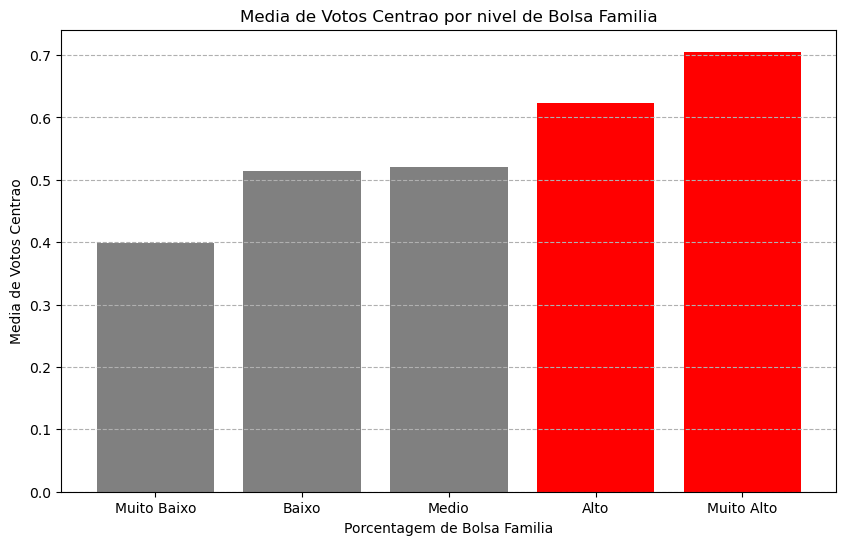

In [179]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# Assuming `data` is your DataFrame

# Create bins for `percent_bolsa`
bins_bolsa = pd.cut(data['percent_bolsa'], bins=5, labels=False)

# Calculate the mean `percentage_votos_centrao` for each bin
bolsa_means = data.groupby(bins_bolsa)['percentage_votos_centrao'].mean()

# Normalize for color mapping
norm = mcolors.Normalize(vmin=bolsa_means.min(), vmax=bolsa_means.max())
colors = ['grey', 'grey', 'grey', 'red', 'red']

# Plotting with specified axis for color bar
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(range(len(bolsa_means)), bolsa_means, color=colors)
ax.set_xticks(range(len(bolsa_means)))
ax.set_xticklabels(["Muito Baixo", "Baixo", "Medio", "Alto", "Muito Alto"])
ax.set_xlabel('Porcentagem de Bolsa Familia')
ax.set_ylabel('Media de Votos Centrao')
ax.set_title('Media de Votos Centrao por nivel de Bolsa Familia')
ax.grid(visible=True, which="major", axis="y", linestyle="--")



plt.show()


In [180]:
fig.savefig("high_resolution_plot.png", dpi=300, bbox_inches='tight')  # Saves with 300 dpi for high quality


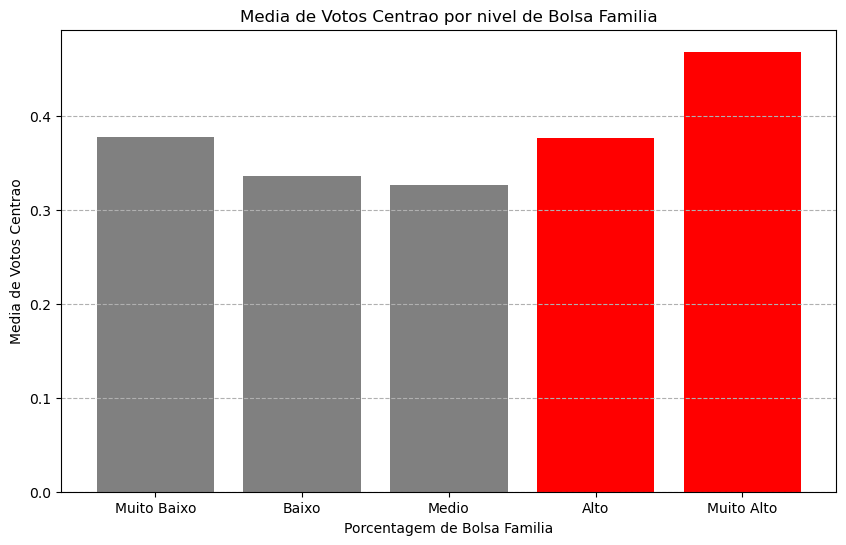

In [181]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# Assuming `data` is your DataFrame

# Create bins for `percent_bolsa`
bins_bolsa = pd.cut(data['percent_transfer'], bins=5, labels=False)

# Calculate the mean `percentage_votos_centrao` for each bin
bolsa_means = data.groupby(bins_bolsa)['percentage_votos_centrao'].mean()

# Normalize for color mapping
norm = mcolors.Normalize(vmin=bolsa_means.min(), vmax=bolsa_means.max())
colors = ['grey', 'grey', 'grey', 'red', 'red']

# Plotting with specified axis for color bar
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(range(len(bolsa_means)), bolsa_means, color=colors)
ax.set_xticks(range(len(bolsa_means)))
ax.set_xticklabels(["Muito Baixo", "Baixo", "Medio", "Alto", "Muito Alto"])
ax.set_xlabel('Porcentagem de Bolsa Familia')
ax.set_ylabel('Media de Votos Centrao')
ax.set_title('Media de Votos Centrao por nivel de Bolsa Familia')
ax.grid(visible=True, which="major", axis="y", linestyle="--")



plt.show()
